In [1]:
from fastai.vision import *

# Download Images

In [2]:
path = Path('data_raw')

In [3]:
path.ls()

[PosixPath('data_raw/picture_urls.txt'),
 PosixPath('data_raw/models'),
 PosixPath('data_raw/.ipynb_checkpoints'),
 PosixPath('data_raw/meme_urls.txt'),
 PosixPath('data_raw/images')]

In [4]:
memes_urls = "meme_urls.txt"
memes_dir = "images/memes"

pics_urls = "picture_urls.txt"
pics_dir = "images/pictures"

In [5]:
download_images(path/memes_urls, path/memes_dir)

In [6]:
download_images(path/pics_urls, path/pics_dir)

In [7]:
# Verify images (remove any non-images or broken links)
verify_images(path/memes_dir, delete=True, max_size=500)
verify_images(path/pics_dir, delete=True, max_size=500)

# View Data

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['memes', 'pictures']

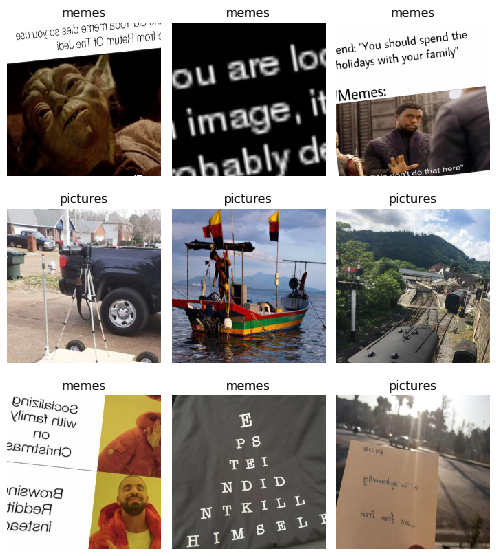

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['memes', 'pictures'], 2, 1434, 358)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.698270,0.325377,0.100559,00:10
1,0.465747,0.189661,0.075419,00:09
2,0.331728,0.197501,0.064246,00:09
3,0.268008,0.193151,0.064246,00:10


In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


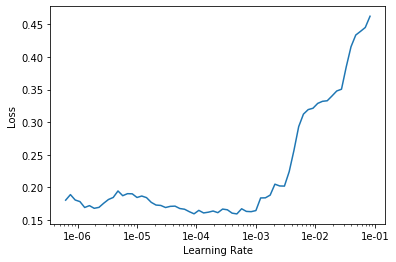

In [17]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(2e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time


In [25]:
learn.save('stage-2')

# Interpretation

In [26]:
learn.load('stage-2');

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

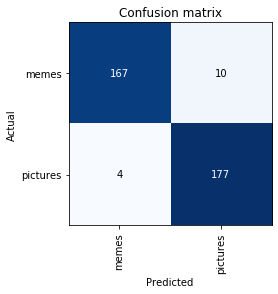

In [28]:
interp.plot_confusion_matrix()

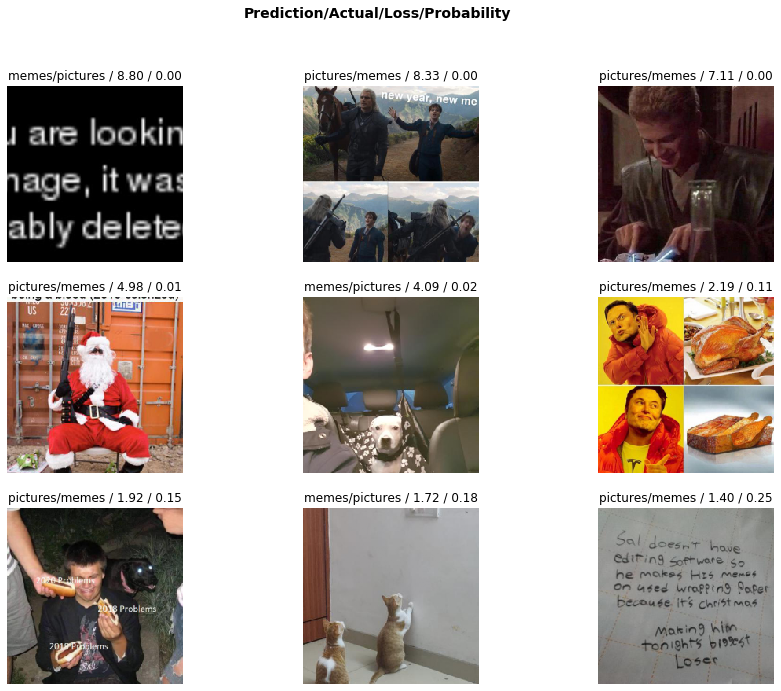

In [29]:
interp.plot_top_losses(9, figsize=(15,11))